Курсовая работа на тему

## Тест на нормальность шума радиолокационного приемника

### 1. Введение

Рассматривается радиолокационная станция (РЛС) кругового обзора с зондирующим импульсом в виде импульса с линейной частотной модуляцией (ЛЧМ, частота синусоиды растет линейно со временем). РЛС излучает ЛЧМ-импульс в диапазоне сверхвысокочастотных волн (СВЧ) с длиной волны 3 см.

Радиолокационный приемник входит в состав РЛС и выполняет функцию приема радиолокационного сигнала в диапазоне СВЧ и его преобразования в низкочастотный дипазон, НЧ (в видеосигнал, содержащий информацию о радиолокационных целях). В рассматриваемом случае преобразование в НЧ диапазон происходит вместе со сжатием ЛЧМ-импульса. В итоге на выходе радиолокационного приемника формируется сигнал, состоящий из множества синусоид с разными амплитудами, частотами и начальными фазами, так, что информацию о радиолокационных целях несет амплитуда (квадрат которой пропорционален мощности отраженного от цели сигнала) и частота (которая пропорциональна расстоянию от РЛС до цели). В современных радиолокационных приемниках выходной НЧ сигнал оцифровывается и подается на процессор быстрого преобразования Фурье, на выходе которого формируется спектр {частота, амплитуда}. Таким образом, Фурье-процессор играет роль спектроанализатора. Набор частот и амплитуд отображается на индикаторах (кругового обзора, ИКО и типа "А", ИТА). Одной Фурье-обработке физически соответствует одно угловое положение (азимут) антенны РЛС, таким образом формируется так называемая развертка по дальности для некоторого азимутального угла. Вращая антенну и накапливая развертки по дальности, можно формировать радиолокационное изображение окружающего РЛС пространства.

Если вместо ЛЧМ-импульса излучать однотональный сигнал (синусоиду), то на выходе радиолокационного приемника будет формироваться так называемый тепловой шум $n(t)$ (шум приемника). Выборки шума $n(t)$ в заданные моменты времени $t_i= i \Delta t$, $i=0,1,2,3,...,$ $n_i = n(t_i)$ (отсчеты напряжения или тока) теоретически (из физики) должны иметь нормальное распределение с нулевым средним, подтверждением чего мы и займемся.

### 2. Чтение данных

На основании заранее записанных цифровых данных noise_*.dat сформируем 10 шумовых реализий $n(t)$.

In [26]:
import struct
import numpy as np

_type = 'd'
fns = ['noise_000.dat', 'noise_001.dat', 'noise_002.dat', 'noise_003.dat', 'noise_004.dat', 'noise_005.dat', 'noise_006.dat', 'noise_007.dat', 'noise_008.dat', 'noise_009.dat']
typeSize = struct.calcsize(_type)

nc = len(fns)

data = np.zeros((3000, nc))
for k in range(nc):
    i = 0
    with open(fns[k], mode='rb') as file:
        raw = file.read(typeSize)    
        while raw:        
            data[i, k] = struct.unpack(_type, raw)[0]        
            raw = file.read(typeSize)
            i += 1

In [27]:
import matplotlib.pyplot as plt

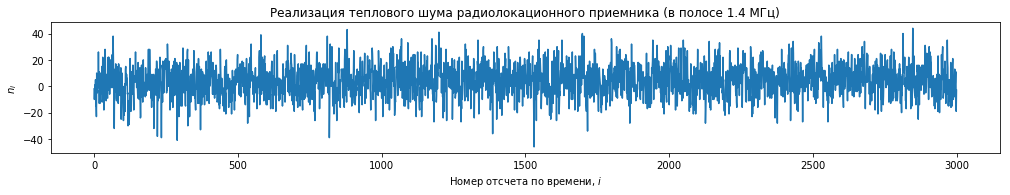

In [42]:
plt.figure(figsize=(17,2.4))
plt.plot(data[:, 0])
plt.title('Реализация теплового шума радиолокационного приемника (в полосе 1.4 МГц)')
plt.xlabel('Номер отсчета по времени, $i$')
plt.ylabel('$n_i$')
plt.show()

### 3. Предварительный анализ данных

Вычислим математические ожидания имеющихся реализаций шума. Теоретически мат. ожидание должно быть равно нулю.

In [52]:
m_noises = data.mean(0)
print(m_noises)

[4.24233333 4.09266667 4.32566667 4.491      4.772      3.80466667
 3.614      4.35666667 4.386      4.39966667]


Чтобы понять существенность отличия от нуля, вычислим соответствующие дисперсии (дисперсия в данном случае пропорциональна мощности шума)

In [54]:
power_noises = data.var(0)
print(power_noises)

[147.54560789 145.25807956 141.93494122 142.22058567 152.01468267
 144.81517822 142.82967067 141.74212222 147.07167067 149.63793322]


Отношение квадрата мат. ожидания к дисперсии (отношение мощностей постоянной и переменной составляющих)

In [55]:
ratio = m_noises**2 / power_noises
print(ratio)

[0.1219785  0.11531145 0.13183077 0.14181548 0.14980121 0.09995837
 0.09144456 0.13390899 0.13080015 0.12935936]


В радиотехнике это отношение принято выражать в децибелах (дБ)

In [58]:
ratio_dB = 10 * np.log10(ratio)
print(ratio_dB)

[ -9.13716707  -9.38127549  -8.79983222  -8.48276353  -8.24484667
 -10.00180856 -10.38842138  -8.73190265  -8.83391771  -8.88202153]


In [59]:
np.abs(ratio_dB).max()

10.38842138359385

Видим, что мощность постоянной составляющей на 10 дБ ниже мощности переменной. Уровень постоянной составляющей довольно-таки высок. Это связано с неидеальностями аппаратуры и переходными процессами в соответствующих фильтрах. Однако для нормальной работы приемника РЛС найденный уровень постоянной составляющей пренебрежимо мал, так как по смыслу анализируемый процесс является шумом приемника, мощность переменной составляющей которого мала по сравнению с принимаемым радиолокационным сигналом.

Выясним значимость отклонения мат. ожидания от нулевого уровня с помощью t-критерия (дисперсия генеральной совокупности здесь неизвестна). Имеем 10 мат. ожиданий, поэтому число степеней свободы $10-1=9$. Зададимся доверительной вероятностью 0.95. Параметр $t = 2.262$.

In [75]:
M = m_noises.mean()
print(M)

4.248466666666667


In [77]:
A2 = np.mean(m_noises**2)
print(A2)
D = (A2 - M**2) * nc / (nc - 1)
print(D)
tn = (M - 0) / np.sqrt(D / nc)
print(tn)

18.151086133333333
0.1129079061728354
39.982508505321114


In [78]:
tn > 2.262

True

Так как расчетное значение больше табличного, то отклонение мат. ожидания от нуля статистически значимо (неслучайно, что и подтверждается влиянием неидеальностей аппаратуры).

Построим гистограмму шума и наложим на нее соответствующую кривую нормального распределения, при этом учтем оцененные мат. ожидание и дисперсию.

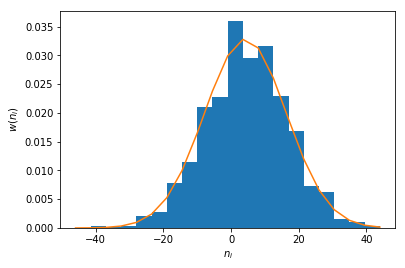

In [101]:
ic = 0
h_0 = plt.hist(data[:, ic], 20, density = 'true')
w_0 = 1 / np.sqrt(2 * np.pi * power_noises[ic]) * np.exp(-(h_0[1] - m_noises[ic])**2 / 2 / power_noises[ic])
plt.plot(h_0[1], w_0)
plt.xlabel('$n_i$')
plt.ylabel('$w(n_i)$')
plt.show()

Зрительно результат удовлетворительный. Однако, требуется применить науку (численные критерии).

### 4. Тестирование реализаций шума на нормальность

Существует множество критериев (тестов) на нормальность, http://datascientist.one/proverka-na-normalnost/

- Шапиро-Уилка
- асимметрии и эксцесса
- Дарбина
- Д’Агостино
- Васичека
- Дэвида-Хартли-Пирсона
- хи-квадрат
- Андерсона-Дарлинга
- Филлибена
- Колмогорова-Смирнова
- Мартинса-Иглевича
- Лина-Мудхолкара
- Шпигельхальтера
- Саркади
- Смирнова-Крамера-фон Мизеса
- Локка-Спурье
- Оя
- Хегази-Грина
- Муроты-Такеучи

Поставим себе задачу проверить теми критериями, которые имеются в библиотеке SciPy.

#### 4.1 Тест Шапиро-Уилка

In [79]:
from scipy import stats

Замечая, что для 3000 отсчетов на реализацию результаты получаются не очень (p-value очень мал), и зная, что данный тест не терпит большого числа отсчетов (более 5000), изменим число отсчетов на 500.

In [124]:
shapiro_l = []
for k in range(nc):
    shapiro_l.append( stats.shapiro(data[1:500, k]) )

In [125]:
shapiro_l

[(0.992933452129364, 0.018903182819485664),
 (0.9965415596961975, 0.35963281989097595),
 (0.997862696647644, 0.7873867154121399),
 (0.9962601661682129, 0.2920338213443756),
 (0.9969728589057922, 0.48434391617774963),
 (0.997907280921936, 0.8017832636833191),
 (0.9970471262931824, 0.5081593990325928),
 (0.9955154061317444, 0.16256965696811676),
 (0.9967833161354065, 0.426525354385376),
 (0.9964273571968079, 0.3308671712875366)]

Анализируя второй столбец (p-value) видим, что по уровню значимости 0.05 тест на нормальность пройден для всех реализаций, кроме первой (там, где p-value меньше 0.05). Однако, сдвигая окно анализа на 500 отсчетов вправо, получаем следующий результат

In [128]:
shapiro_l = []
for k in range(nc):
    shapiro_l.append( stats.shapiro(data[500:1000, k]) )

In [129]:
shapiro_l

[(0.9972313046455383, 0.5678586959838867),
 (0.9962875247001648, 0.29660314321517944),
 (0.9964649081230164, 0.33851978182792664),
 (0.9972790479660034, 0.5842409729957581),
 (0.9976127743721008, 0.7009921073913574),
 (0.9950881600379944, 0.11368999630212784),
 (0.9965143799781799, 0.3509990870952606),
 (0.9951844811439514, 0.12311805784702301),
 (0.9933654069900513, 0.026812292635440826),
 (0.996357798576355, 0.31269019842147827)]

Здесь тест пройден для всех реализаций, кроме предпоследней. Это, скорее всего, говорит о неоднородности шума по времени. Но в большинстве случаев шум можно считать нормальным (здесь 9 из 10).